In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
model=Sequential()

In [6]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))


In [7]:
model.add(MaxPooling2D(pool_size=2))

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))


In [9]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [10]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [11]:
model.add(Flatten())

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [13]:
# create Ann on top og cnn
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [14]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform')) # final nuron

In [15]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [17]:
from keras.preprocessing.image import ImageDataGenerator #precprocessing, augmentation etc

In [18]:
train_datagen = ImageDataGenerator(
        rescale=1./255, #each and every pixel value will be multiplied with 1.0/255.0
        shear_range=0.2, #Bigger the number higher is the shearing in synthetic images
        zoom_range=0.2, #range will be from 0 to 0.2
        horizontal_flip=True) #Just object instantiation

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)  # for test data we just need to rescale 

In [20]:
#flow_from_directory will load the images, augment them batch by batch from the disk to the RAM
train_set = train_datagen.flow_from_directory (
    '/content/drive/MyDrive/Dogs _ cats images/training_set',
    target_size=(64, 64), #Each and every image will be reshaped to 64x64 prior to being fed to the CNN
    batch_size=32,
    class_mode='binary')


Found 2000 images belonging to 2 classes.


In [21]:
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dogs _ cats images/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [22]:
#train_set and test_set are my data loaders

In [23]:
# 2000 images in disk -> select random 32 images -> Apply random augmention -> feed these 32 augmented images to the CNN

In [24]:
len(train_set), 2000/32

(63, 62.5)

In [25]:
#train_set is a data generator and it can supply infinite batches of images, all of them randomly augmented
model.fit(train_set, #Exclusively we do not need to specify 'y' here
        steps_per_epoch= len(train_set), #No of batches the CNN goes through before we call it a logical epoch
        epochs=10,
        validation_data=test_set,
        validation_steps=len(test_set))

Epoch 1/10
63/63 [==============================] - 472s 7s/step - loss: 0.6940 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 13s 210ms/step - loss: 0.6932 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 13s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 13s 208ms/step - loss: 0.6933 - accuracy: 0.4870 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 13s 205ms/step - loss: 0.6932 - accuracy: 0.4930 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 13s 208ms/step - loss: 0.6932 - accuracy: 0.4830 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 13s 208ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
E

Predicting a New Image

In [26]:
import numpy as np
from keras.preprocessing import image

In [27]:
new_image=image.load_img('/content/drive/MyDrive/Abhishek/catsanddogs/Copy of download.jpg',target_size=(64,64))

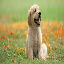

In [28]:
new_image

In [29]:
#Change the image to numpy array
new_image=image.img_to_array(new_image)

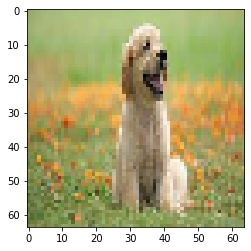

In [30]:
import matplotlib.pyplot as plt
plt.imshow(new_image.astype(int))

In [31]:
type(new_image)

numpy.ndarray

In [32]:
new_image.shape

(64, 64, 3)

The input needs to be in 4 dimesnion. 4th Dim represents the batch size so add one more dimesion using the expand_dims function.

In [33]:
new_image=np.expand_dims(new_image,axis=0)

In [34]:
new_image.shape

(1, 64, 64, 3)

In [35]:
result=model.predict(new_image)

In [39]:
result[0][0]

0.5008221

In [37]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [42]:
result=model.predict(new_image)
if result[0][0]<=0.5:
    predict=print('This is a Dog')
else:
    predict=print('This is a Cat')

This is a Cat
